<div style='background-color: dark; padding: 20px'>
<h1 style='color: orange; fontweight: bold'>Projet 7 - Implémentez un modèle de scoring</h1>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Loading Python libraries</h3>
</div>

In [86]:

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns

import missingno as msno

# sklearn preprocessing for dealing with categorical variables anf feature engineering
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as SMOTE_Pipeline


from datetime import datetime
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

import time

from adjustText import adjust_text


from IPython.display import display, JSON, Markdown, HTML, display_pdf, clear_output

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature, ModelSignature
from mlflow.types.schema import Schema, ParamSchema, ParamSpec, ColSpec
import mlflow.pyfunc
from mlflow import MlflowClient

from joblib import dump, load

from lime.lime_tabular import LimeTabularExplainer
import shap
import random


import joblib

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

from typing import Any, Tuple

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 1 - EDA using recommended Kaggle kernels</h2>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>Link to Will Koehrsen's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook'>https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook<astyle=a></p>
<p style='color: blue; fontweight: bold'>Link to Aguiar's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script'>https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script<astyle=a></p>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 1.1 - Loading and exploring data</h3>
</div>

In [87]:
# List files available
print(os.listdir("data_for_credit_scoring_model"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [88]:
# load application training data
path = 'data_for_credit_scoring_model/'
application_train = pd.read_csv(path + 'application_train.csv')

pd.set_option('display.max_columns', None)
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [89]:
# display shape of application_train dataframe
application_train.shape

(307511, 122)

In [90]:
# load application test data
path = 'data_for_credit_scoring_model/'
application_test = pd.read_csv(path + 'application_test.csv')

In [91]:
# display shape of application_test dataframe
application_test.shape

(48744, 121)

In [92]:
# display app_test first rows
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>There's one column less in the training set. The TARGET column is missing.</p>
</div>

In [93]:
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Target variable')

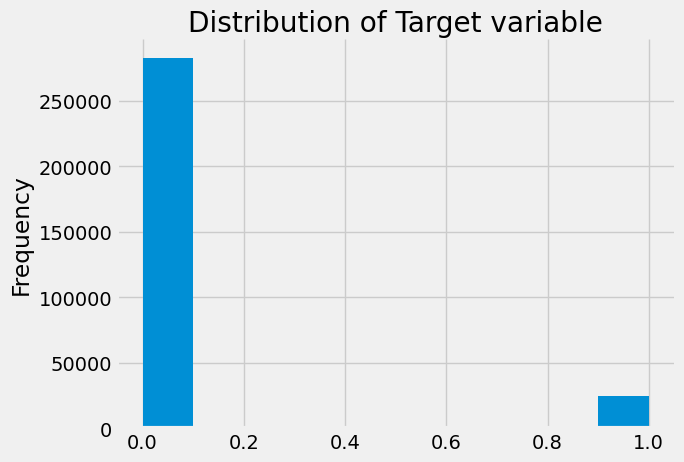

In [94]:
application_train['TARGET'].astype(int).plot.hist()
sns.despine()
plt.title('Distribution of Target variable')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The target variable only takes 2 values; 0 if the loan was repaid on time, and 1 if the client struggled to repay his debt. We've got a binary classification problem with an imbalanced dataset.<br><br> Let's now visualize the percentage of missing values in each column.</p>
</div>

In [95]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [96]:
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [97]:
# columns with less missing values
missing_values.tail(20)

,Missing Values,% of Total Values
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5


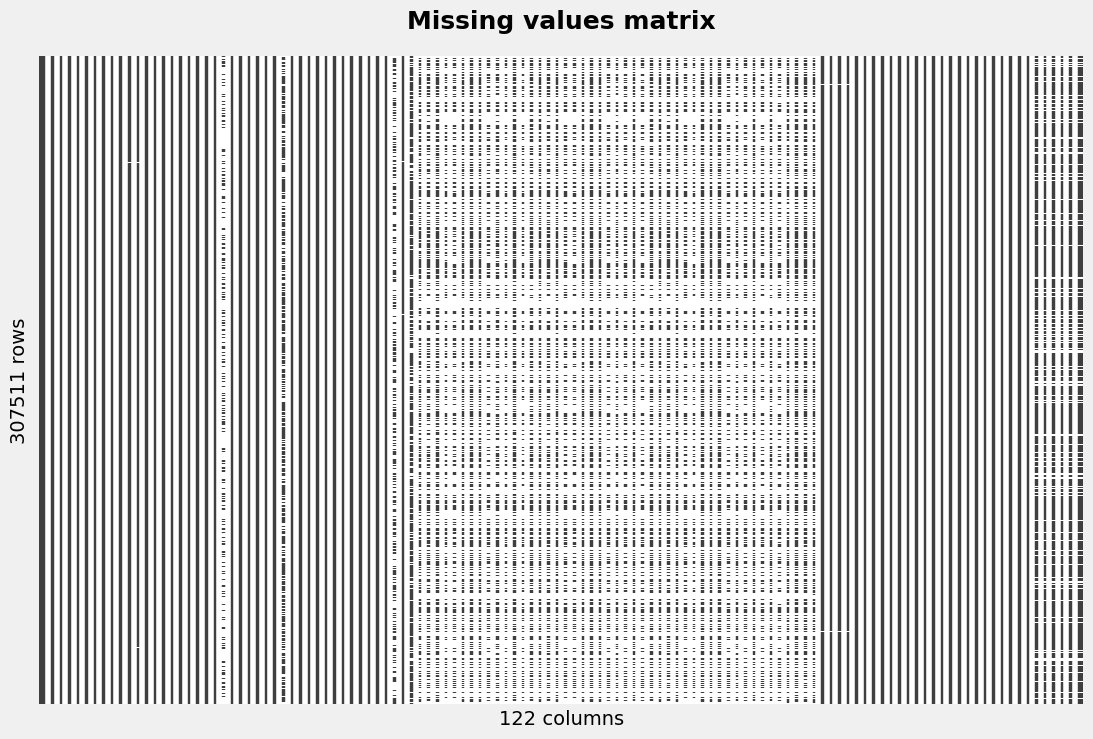

In [98]:
# missing values matrix
fig, ax = plt.subplots(1, 1, figsize=(12,8))
msno.matrix(application_train, ax=ax)
ax.set_title("Missing values matrix", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel(f'{application_train.shape[1]} columns', fontsize=14)
ax.set_ylabel(f'{application_train.shape[0]} rows', fontsize=14)
ax.set_xticklabels([]) 
ax.set_yticklabels([])
plt.show()

In [99]:
# Number of columns of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [100]:
# Number of unique classes in each object column of application_train
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [101]:
# Number of unique classes in each object column of application_test
application_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Let's encode each categorical variable. If the number of modalities is 2 we will encode the variable using a Label Encoder, if it is greater than 2, we will use a OneHotEncoder.</p>
</div>

In [102]:
# make copy of original dataframes
app_train = application_train.copy()
app_test = application_test.copy()

In [103]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [104]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>There are more columns in app_train than in app_test because in app_train the categorical variables CODE_GENDER, NAME_INCOME_TYPE and NAME_FAMILY_STATUS contain each 1 more modality than in app_test. Therefore we will align the two dataframes so as to keep the same columns, but first we will extract the target column from app_train since it it not present in app_test.</p>
</div>

In [105]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The variable DAYS_BIRTH indicates the age of a client in days at the time he or she contracted the loan. The age is expressed in negative days for unknown reasons. Let's display some stats (expressed in years) about this variable so as to look for anomalies.</p>
</div>

In [106]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The min age is 20, the max age is 69, the mean is 43; those statistics look normal, meaning there are no outliers in this column. Let's check in DAYS_EMPLOYED</p>
</div>

In [107]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The maximum value is positive (whereas the other statistics are negative) and, when converted in years, amounts to 1000 years ! Nobody can be employed for 100 years, let alone 1000 !</p>
</div>

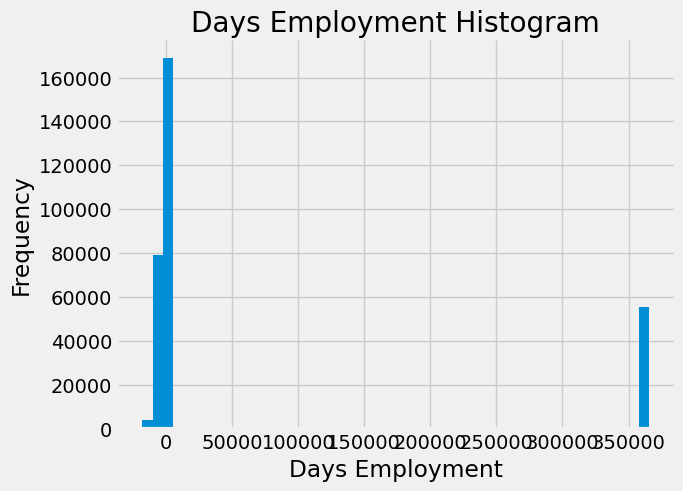

In [108]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', bins=50)
plt.xlabel('Days Employment')
sns.despine()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Do 'anomalous' clients have higher rates of default than the rest of the clients? Let's see.</p>
</div>

In [109]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>It seems that the anomalous clients tend to default less...that is strange. Since we have 55374 rows with the exact same number of days (365243) in the DAYS_EMPLOYED column, we will replace 365243 with NaN values, both in app_train and app_test.</p>
</div>

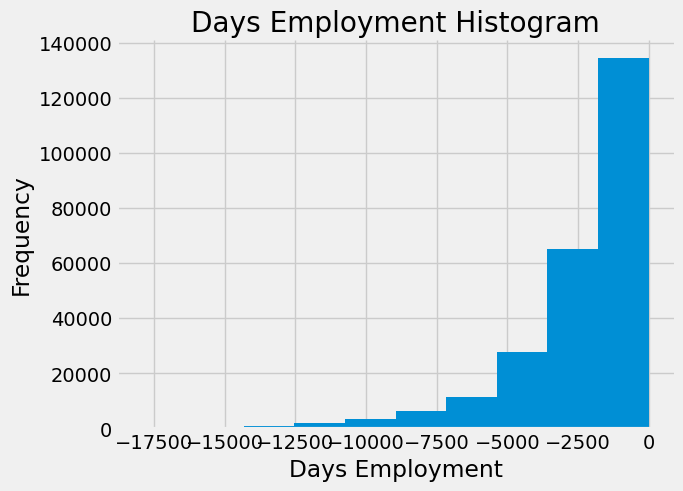

In [110]:
dfs = [app_train, app_test]

for df in dfs:
    # Create an anomalous flag column
    df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243

    # Replace the anomalous values with nan
    df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
sns.despine()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Let's evaluate correlations between the target and the explanatory variables.</p>
</div>

In [111]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(15))
print('\nMost Negative Correlations:\n', correlations.tail(15))

Most Positive Correlations:
 TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
Name: TARGET, dtype: float64

Most Negati

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Aside from TARGET which obviously has a perfect correlation with itself, DAYS_BIRTH is the most positive correlation. The correlation is positive, but the values of DAYS_BIRTH are actually negative (as mentioned previously), which is a little confusing to interpret.</p>
</div>

In [112]:
# Replace negative values in DAYS_BIRTH so as to get the age of a client in days when he or she contracted the loan
# Find the correlation of the positive days since birth and target

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])
    
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982709)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>It's clearer now. As clients get older, they are less likely to default on their loan, and therefore more likely to have 0 in the TARGET column, 0 meaning their loan was repaid on time.<br><br> Let's have a look at the age histogram (after converting days in years)...</p>
</div>

Text(0, 0.5, 'Count')

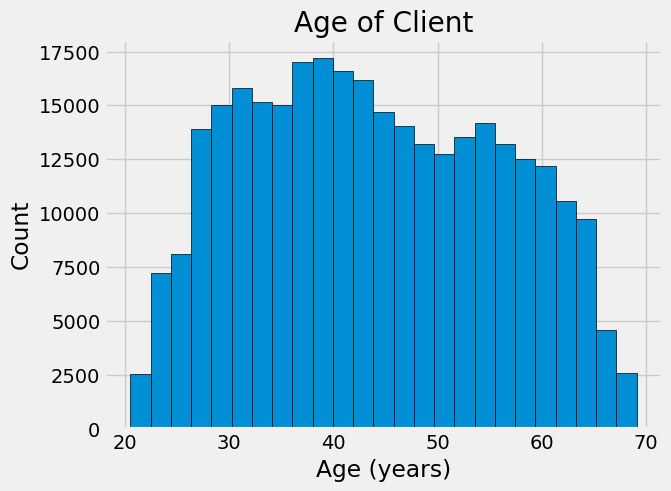

In [113]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>...as well as a Kdeplot of loans repaid on time and a kdeplot of loans that were not repaid on time:</p>
</div>

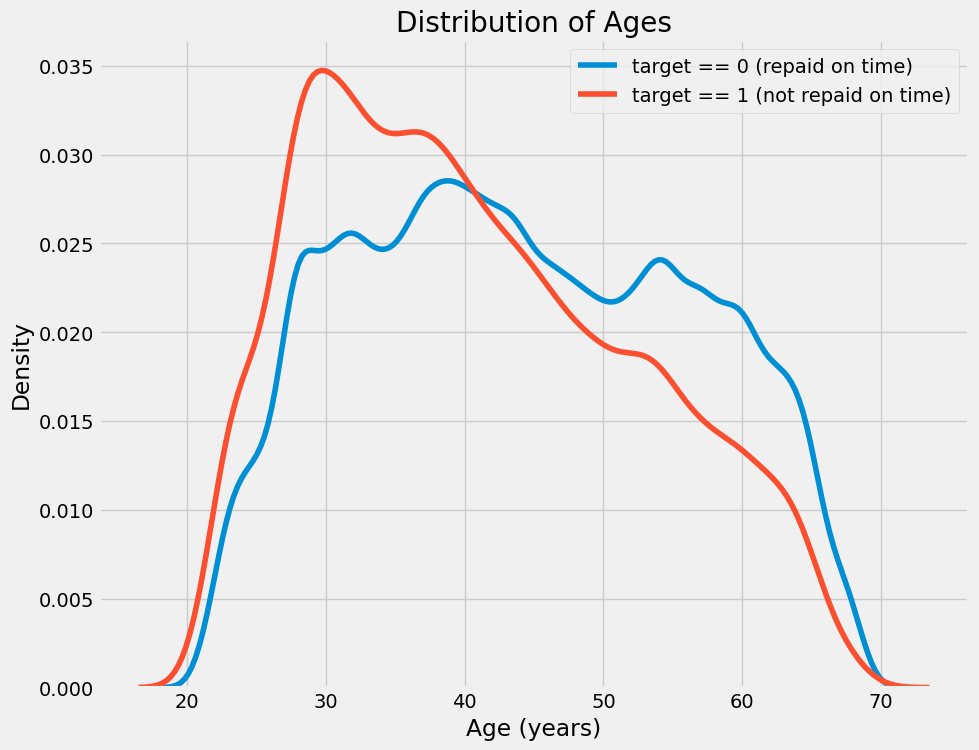

In [114]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, 
            label = 'target == 0 (repaid on time)', legend=True)

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, 
            label = 'target == 1 (not repaid on time)', legend=True)

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>We observe that the distribution of people who did not repay their loans on time (red curve) is skewed to the left, meaning younger clients struggle to repay their debt more often than older clients. Let's cut the age variable into bins of 5 years, and then calculate, for each age bin, the ratio of loans that were not repaid.</p>
</div>

In [115]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [116]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [117]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

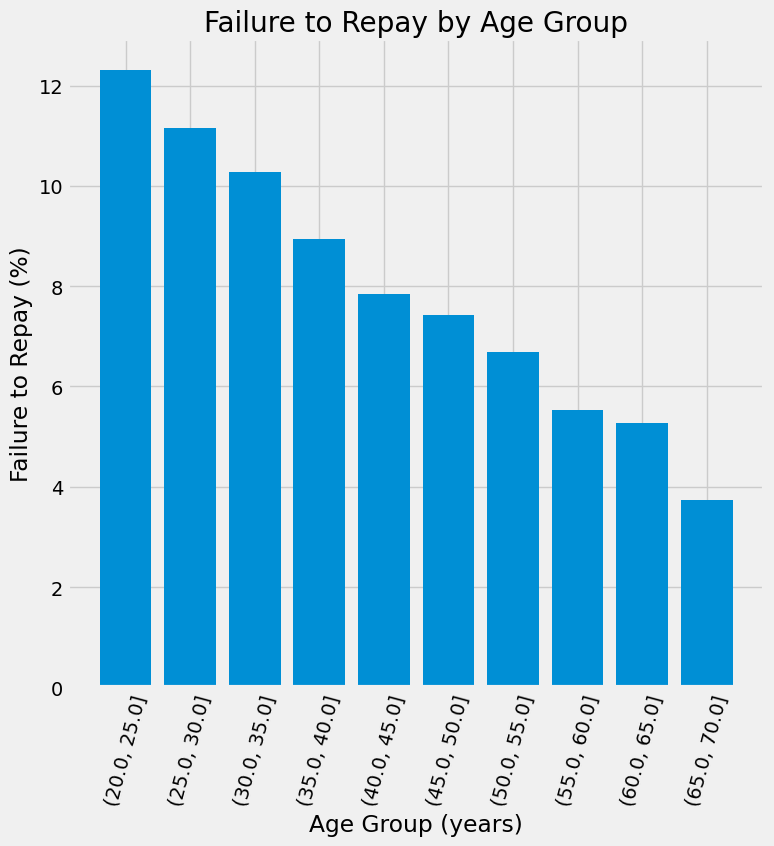

In [118]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The chart above confirms what we already observed on the kdeplot: younger people are more likely to fail repaying their loans. In fact the youngest three age groups have failure to repay rates above 10%, which means the bank should be more cautious with regard to these clients.</p>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 are the variables with the strongest negative correlations with the target and seem to represent some sort of cumulative credit rating calculated using numerous sources of data.
Let's have a look at the correlations of these 3 variables with the target and with each other.</p>
</div>

Text(0.5, 1.0, 'Correlation Heatmap')

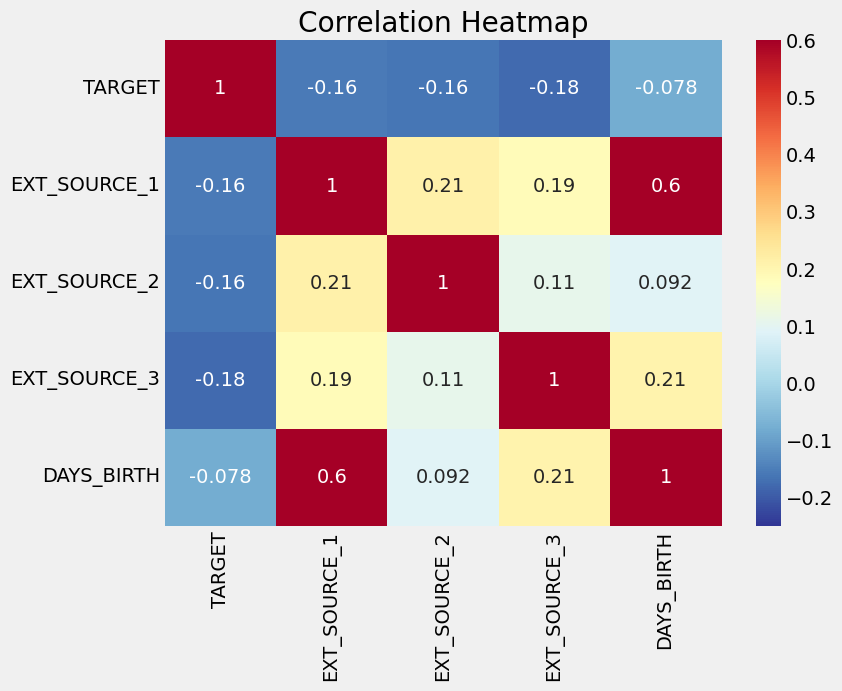

In [119]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()


plt.figure(figsize = (8, 6))
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

In [120]:
# display statistics about the EXT_SOURCE variables
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The three EXT_SOURCE variables, which are scores ranging from 0 to 1, have negative correlations with the target, even though these correlations are very weak. As the EXT_SOURCE variables increase, a client is more likely to repay the loan. Moreover, the variable EXT_SOURCE_1 has a strong correlation with DAYS_BIRTH, meaning that one of the factors used to calculate the EXT_SOURCE_1 score may be the age of the client.<br><br>
Let's visualize the distribution of each of these EXT_SOURCE variables colored by the value of the target so as to study the effect of this variable on the target.</p>
</div>

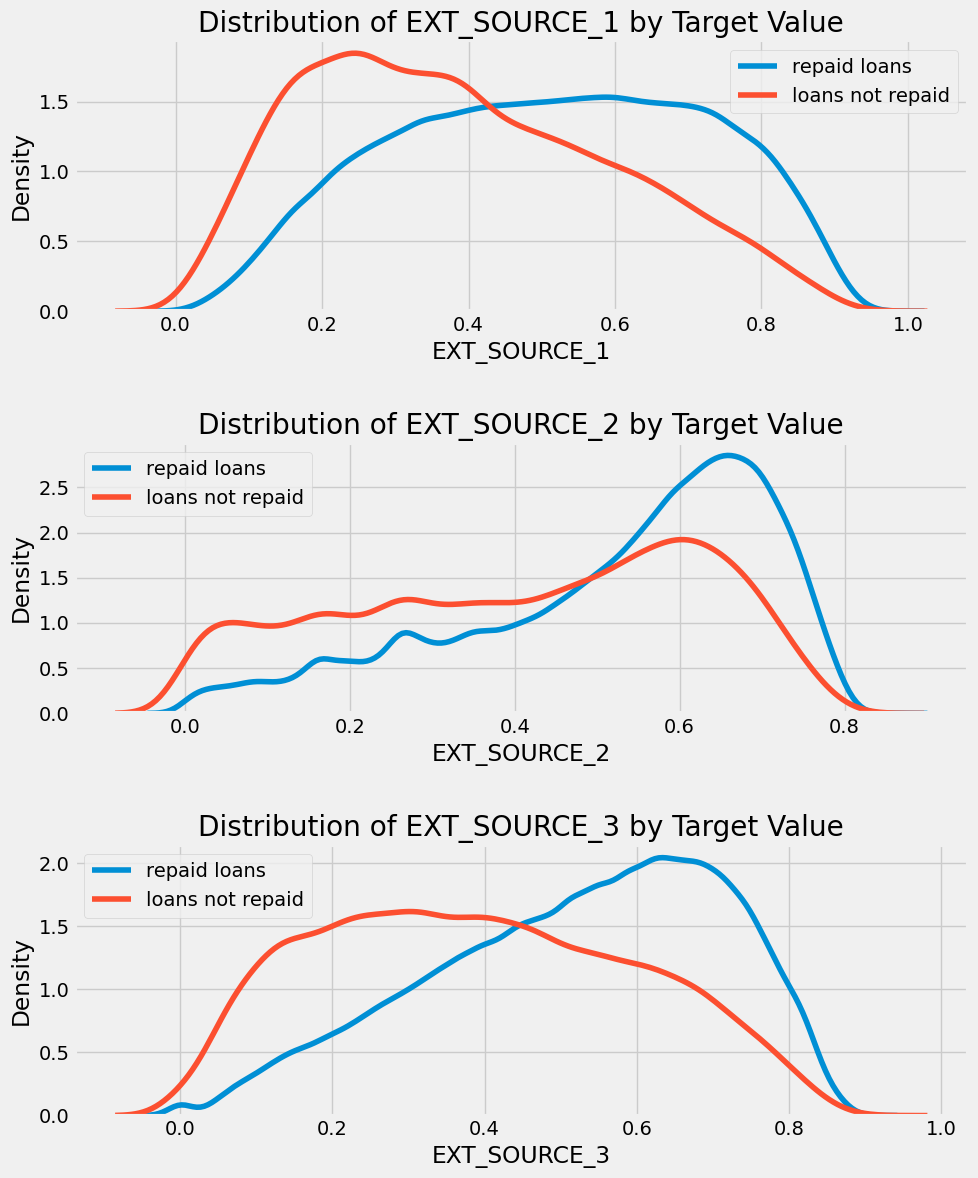

In [121]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'repaid loans', legend=True)
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'loans not repaid', legend=True)
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density'); plt.legend()
    
plt.tight_layout(h_pad = 2.5)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>If the blue and red curves overlap significantly, the EXT_SOURCE feature might not be a strong predictor of the target.
If the curves differ substantially, the source might be a valuable feature in predicting loan repayment outcomes. Out of the three EXT_SOURCE features, the first and third ones seem to be the most useful. <br><br>Let's now generate a final visualization that will help us understand the relationship between these 3 features and the age of a client.</p>
</div>

In [122]:
# display number of nan values per column in ext_data
ext_data.isna().sum()

TARGET               0
EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
DAYS_BIRTH           0
dtype: int64

In [123]:
# drop nan values
ext_data.dropna(inplace=True)

In [124]:
# express 'DAYS_BIRTH' in years
ext_data['years_birth'] = ext_data['DAYS_BIRTH'] / 365

<Axes: xlabel='EXT_SOURCE_3', ylabel='years_birth'>

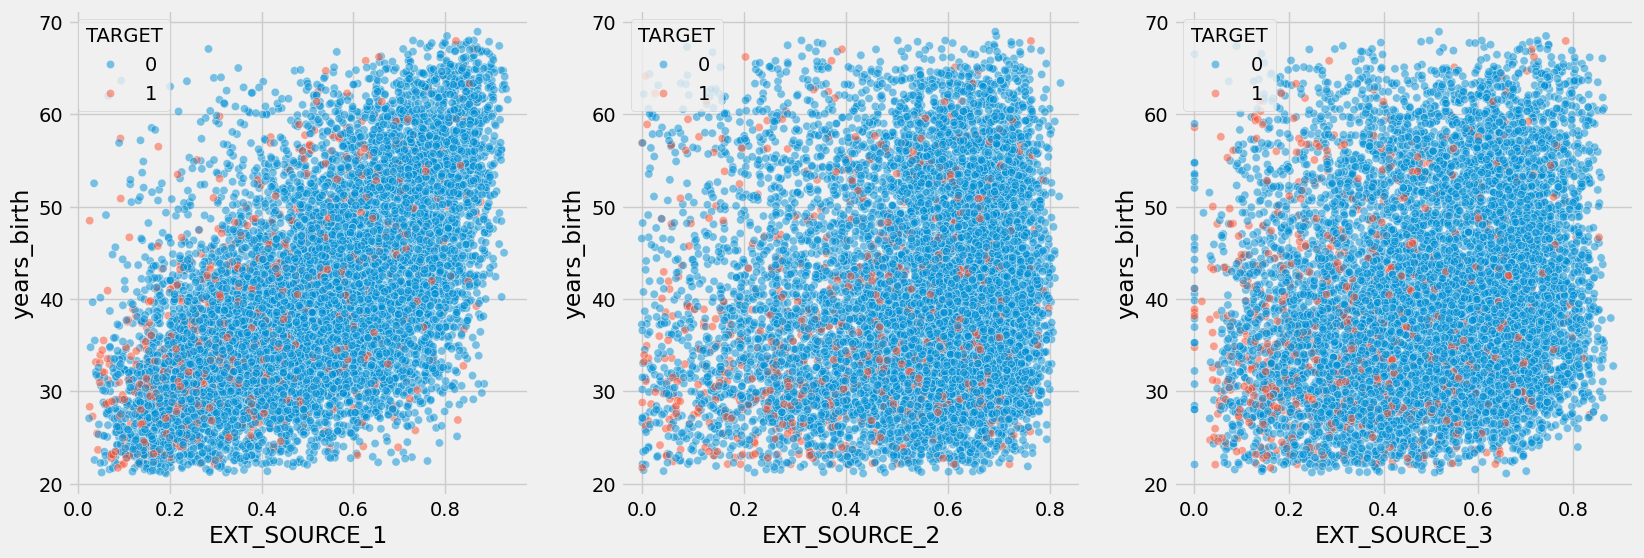

In [125]:
# scatter plot using only the first 10000 rows
vars = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(ext_data.iloc[:10000, :], x=vars[0], y='years_birth', hue ='TARGET', alpha = 0.5, ax=axes[0])
sns.scatterplot(ext_data.iloc[:10000, :], x=vars[1], y='years_birth', hue ='TARGET', alpha = 0.5, ax=axes[1])
sns.scatterplot(ext_data.iloc[:10000, :], x=vars[2], y='years_birth', hue ='TARGET', alpha = 0.5, ax=axes[2])

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>There seems to exist a moderate linear relationship between EXT_SOURCE_1 and the age of a client.
</p>
</div>

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 2 - Feature Engineering</h2>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>Link to Will Koehrsen's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook'>https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook<astyle=a></p>
<p style='color: blue; fontweight: bold'>Link to Aguiar's kernel: <a style='color: blue; fontweight: bold' href='https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script'>https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script<astyle=a></p>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 2.1 - Polynomial Features</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Again, we'll pretty much copy what was done in Will Koehrsen's kernel. Adding polynomial features is a way to enhance the predictive power of a model, especially when dealing with non-linear relationships between variables. Polynomial features introduce non-linearity, allowing models like linear regression to capture more complex patterns.
</p>
</div>

In [126]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [127]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [128]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [129]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display correlations
print(poly_corrs.head(15))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
Name: TARGET, dtype: float64


In [130]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Here we'll just add a function to rename columns ending in _x and remove the ones ending in _y. These suffixes were added during the merge and we have duplicated columns.
</p>
</div>

In [131]:
def clean_merged_columns(df):
    """rename columns ending in _x post merger, and remove columns ending in _y
    """
    # select columns to rename
    renamed_columns = [col for col in df.columns if col.endswith('_x')]

    # Rename columns
    df = df.rename(columns={col: col[:-2] for col in renamed_columns})

    # remove the ones ending in '_y'
    df = df.loc[:, ~df.columns.str.endswith('_y')]
    return df

In [132]:
app_train = clean_merged_columns(app_train)
app_test = clean_merged_columns(app_test)

In [133]:
app_train.columns.tolist()

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [134]:
train_labels = app_train['TARGET']

# Align the dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train.shape)
print('Testing data with polynomial features shape:  ', app_test.shape)

Training data with polynomial features shape:  (307511, 272)
Testing data with polynomial features shape:   (48744, 271)


<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 2.2 - Domain Knowledge Features
</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>We will create 4 more variables that may be relevant for predicting who's going to repay or not repay their loans. Here are the definitions of these variables as stated in the first Kaggle Kernel:
<ul style='color: black; fontweight: bold'>
    <li>CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    </li>
    <li>ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    </li>
    <li>CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
    </li>
    <li>DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
    </li>
</ul>
</p>
</div>

In [135]:
# create variables in app_train
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

In [136]:
# create variables in app_test
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

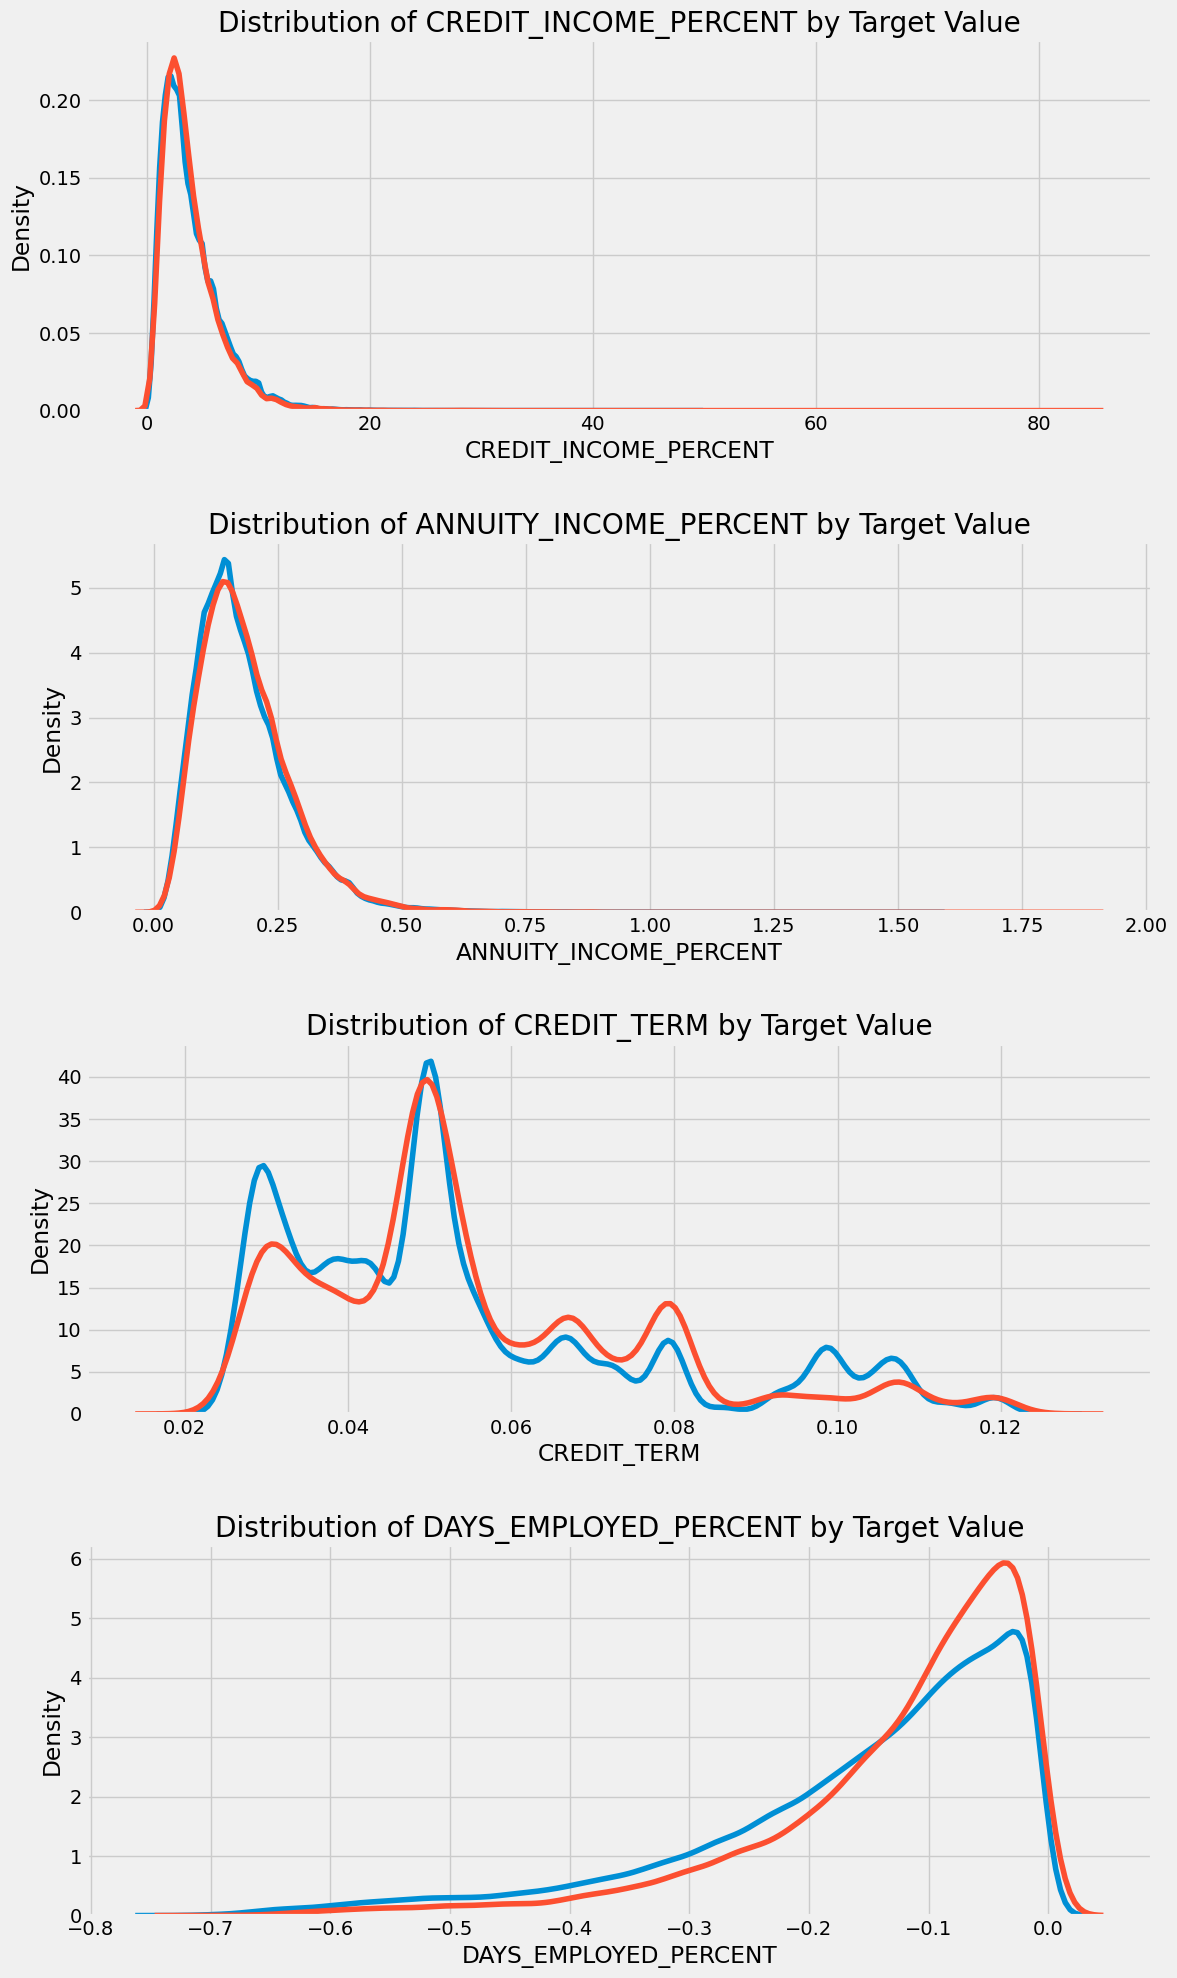

In [137]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Part 3 - Baseline</h2>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 3.1 - Selecting a few variables to train a first model
</h3>
</div>

In [138]:
# let's pick some of the variables most correlated with the target 
# and we will aslo keep the client id for practicality sake
vars_to_use = [ 'TARGET', 'SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CODE_GENDER_M', 'CODE_GENDER_F',
                'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
                'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED_PERCENT'
                ]

In [139]:
# define new dataframes and print their shape
df_train = app_train[vars_to_use]
df_test = app_test[vars_to_use[1:]] # since the test set lacks a target variable we remove it from vars_model1

print('shape df_train', df_train.shape)
print('shape df_test', df_test.shape)

shape df_train (307511, 16)
shape df_test (48744, 15)


In [140]:
# number of nan per column
df_train.isna().sum()

TARGET                         0
SK_ID_CURR                     0
EXT_SOURCE_1              173378
EXT_SOURCE_2                 660
EXT_SOURCE_3               60965
DAYS_BIRTH                     0
DAYS_EMPLOYED              55374
CODE_GENDER_M                  0
CODE_GENDER_F                  0
CREDIT_INCOME_PERCENT          0
ANNUITY_INCOME_PERCENT        12
CREDIT_TERM                   12
AMT_CREDIT                     0
AMT_ANNUITY                   12
AMT_INCOME_TOTAL               0
DAYS_EMPLOYED_PERCENT      55374
dtype: int64

In [141]:
# define dataframe with no missing values
df_train_no_nan = df_train.dropna()
df_test_no_nan = df_test.dropna()

In [142]:
# shape of dataframe after dropping all nan values
print('Shape of df_train_no_nan', df_train_no_nan.shape)
print('Shape of df_test_no_nan', df_test_no_nan.shape)

Shape of df_train_no_nan (98956, 16)
Shape of df_test_no_nan (20823, 15)


In [143]:
# take only a fraction of df_train_model1_no_nan so as to reduce training time
df_train_sampled = df_train_no_nan.groupby('TARGET', group_keys=False).apply(lambda x: x.sample(frac=0.10, random_state=66))
df_train_sampled.shape

(9896, 16)

In [144]:
df_train_sampled['TARGET'].value_counts()

TARGET
0    9150
1     746
Name: count, dtype: int64

In [145]:
df_train_sampled.head()

,TARGET,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,CODE_GENDER_M,CODE_GENDER_F,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,DAYS_EMPLOYED_PERCENT
235815,0,373144,0.639797,0.692609,0.588488,16000,-9272.0,False,True,3.243520,0.220560,0.068000,364896.0,24813.0,112500.0,-0.579500
70937,0,182273,0.245979,0.476479,0.352340,11624,-857.0,False,True,3.746674,0.159419,0.042549,724981.5,30847.5,193500.0,-0.073727
237628,0,375247,0.766226,0.758066,0.406617,14659,-689.0,False,True,2.350600,0.084917,0.036126,634662.0,22927.5,270000.0,-0.047002
97566,0,213284,0.711189,0.695955,0.646330,14106,-1306.0,True,False,4.661667,0.208433,0.044712,1258650.0,56277.0,270000.0,-0.092585
86155,0,199978,0.629108,0.782915,0.551381,18965,-2301.0,True,False,7.574120,0.301520,0.039809,852088.5,33921.0,112500.0,-0.121329


In [146]:
def plot_distributions(df, vars):
    fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(28, 24))
    flierprops = dict(marker='o', markersize=8, markerfacecolor='orange', linestyle='none', alpha=0.7)
    meanprops = dict(marker='o', markersize=8, markeredgecolor='black', markerfacecolor='red')
    medianprops = dict(color='white', linewidth=1)
    outliers_marker = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=9, label='Outliers')
    mean_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=9, label='Mean')

    numeric_vars = df[vars].select_dtypes(include=np.number).columns

    for i, variable in enumerate(numeric_vars):
        row = (i // 7) * 2
        col = i % 7

        # Boxplot
        ax_boxplot = axes[row, col]
        sns.boxplot(data=df, y=variable, ax=ax_boxplot, color="blue", showmeans=True, flierprops=flierprops, meanprops=meanprops, medianprops=medianprops)
        ax_boxplot.set_title(variable, pad=20)
        ax_boxplot.set_ylabel('')
        ax_boxplot.set_xlabel('')

        # Histplot
        ax_histplot = axes[row + 1, col]
        sns.histplot(df[variable].dropna(), bins=30, kde=False, ax=ax_histplot, color="blue")
        ax_histplot.set_ylabel('')
        ax_histplot.set_xlabel('')
        ax_histplot.set_title(variable, pad=20)

        # Test de normalité Shapiro-Wilk
        stat, p_value = stats.shapiro(df[variable].dropna())
        normal_test_result = "Normal" if p_value > 0.05 else "Non-Normal"
        ax_histplot.text(0.05, 0.95, f'Shapiro-Wilk test:\np-value: {p_value:.3f}\n{normal_test_result}', transform=ax_histplot.transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    plt.style.use('fivethirtyeight')
    plt.legend(handles=[mean_marker, outliers_marker], fontsize=12, loc='upper left')
    plt.tight_layout(pad=3)
    plt.show()

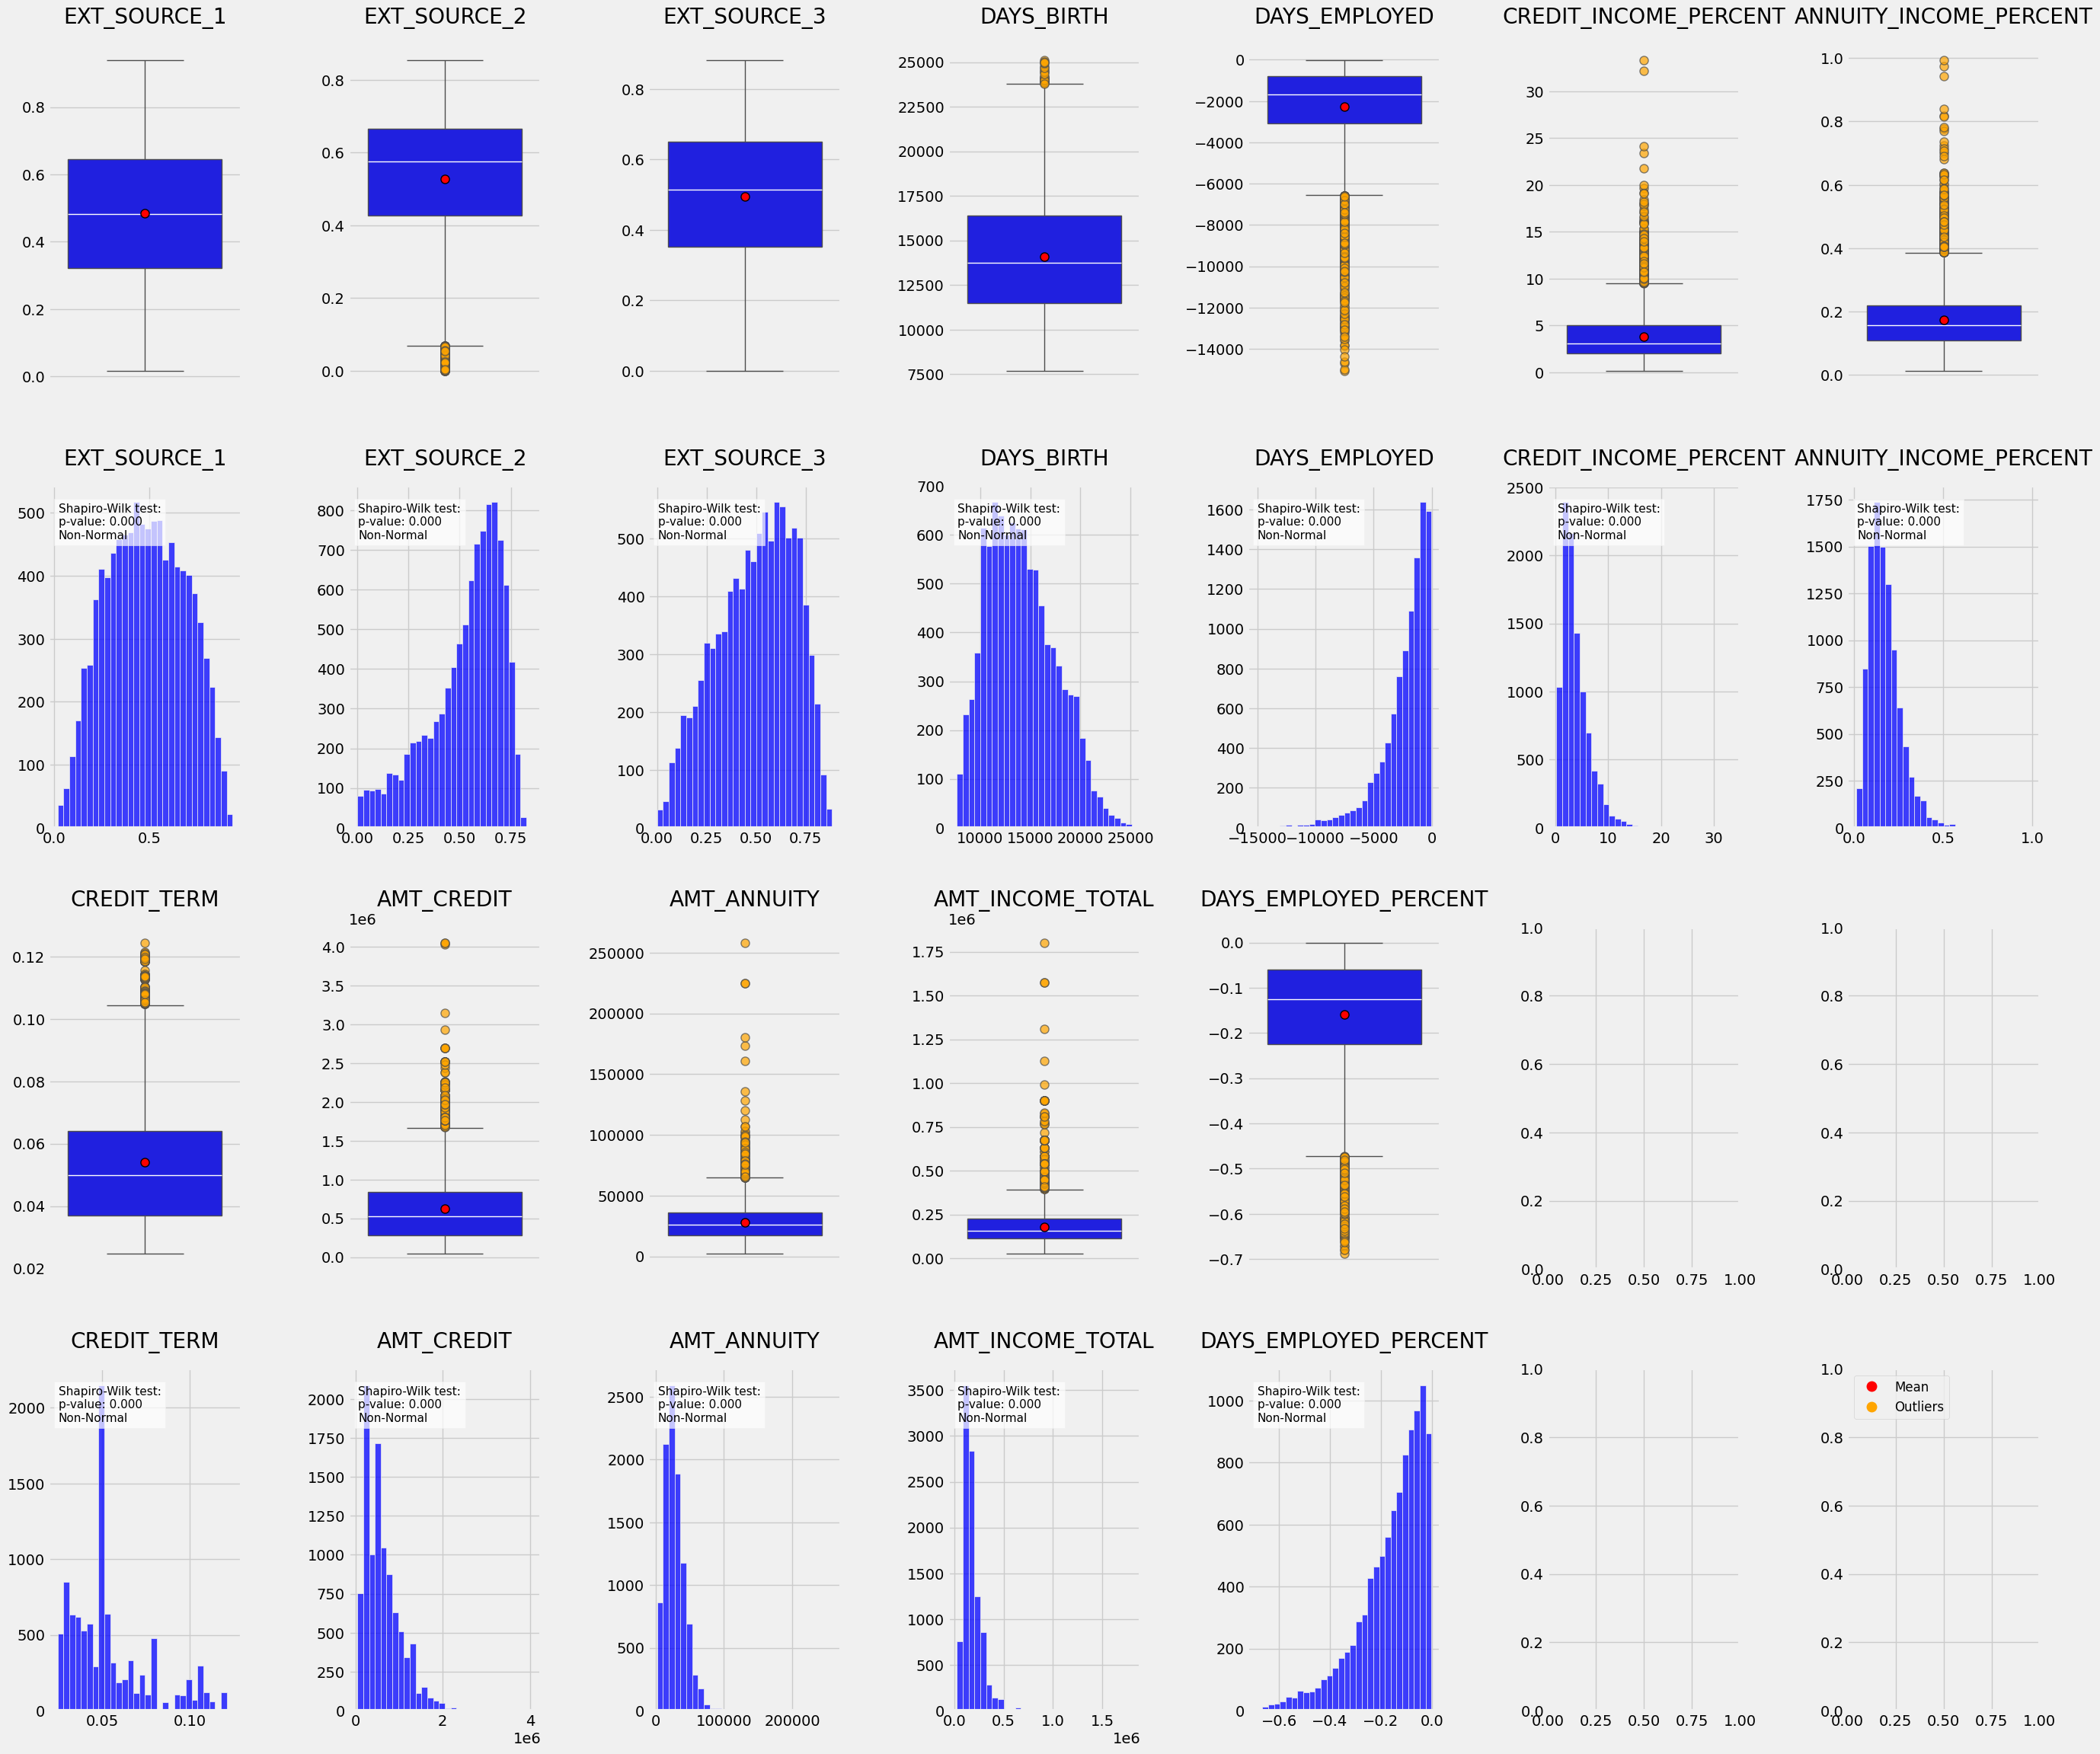

In [147]:
plot_distributions(df_train_sampled, df_train_sampled.iloc[:, 2:].columns.tolist())

In [148]:
# take the absolute value of DAYS_EMPLOYED to avoid errors caused by log of values <= 0
df_train_sampled['DAYS_EMPLOYED'] = abs(df_train_sampled['DAYS_EMPLOYED'])
df_train_sampled['DAYS_EMPLOYED_PERCENT'] = abs(df_train_sampled['DAYS_EMPLOYED_PERCENT'])

In [149]:
# same for the test set
df_train_sampled['DAYS_EMPLOYED'] = abs(df_train_sampled['DAYS_EMPLOYED'])
df_train_sampled['DAYS_EMPLOYED_PERCENT'] = abs(df_train_sampled['DAYS_EMPLOYED_PERCENT'])

In [150]:
# log transform some variables that are very skewed
df_model1_no_nan_log = df_train_sampled.copy()
for col in df_model1_no_nan_log[['DAYS_EMPLOYED', 'CREDIT_INCOME_PERCENT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']].columns:
    df_model1_no_nan_log[col] = np.log1p(df_model1_no_nan_log[col])

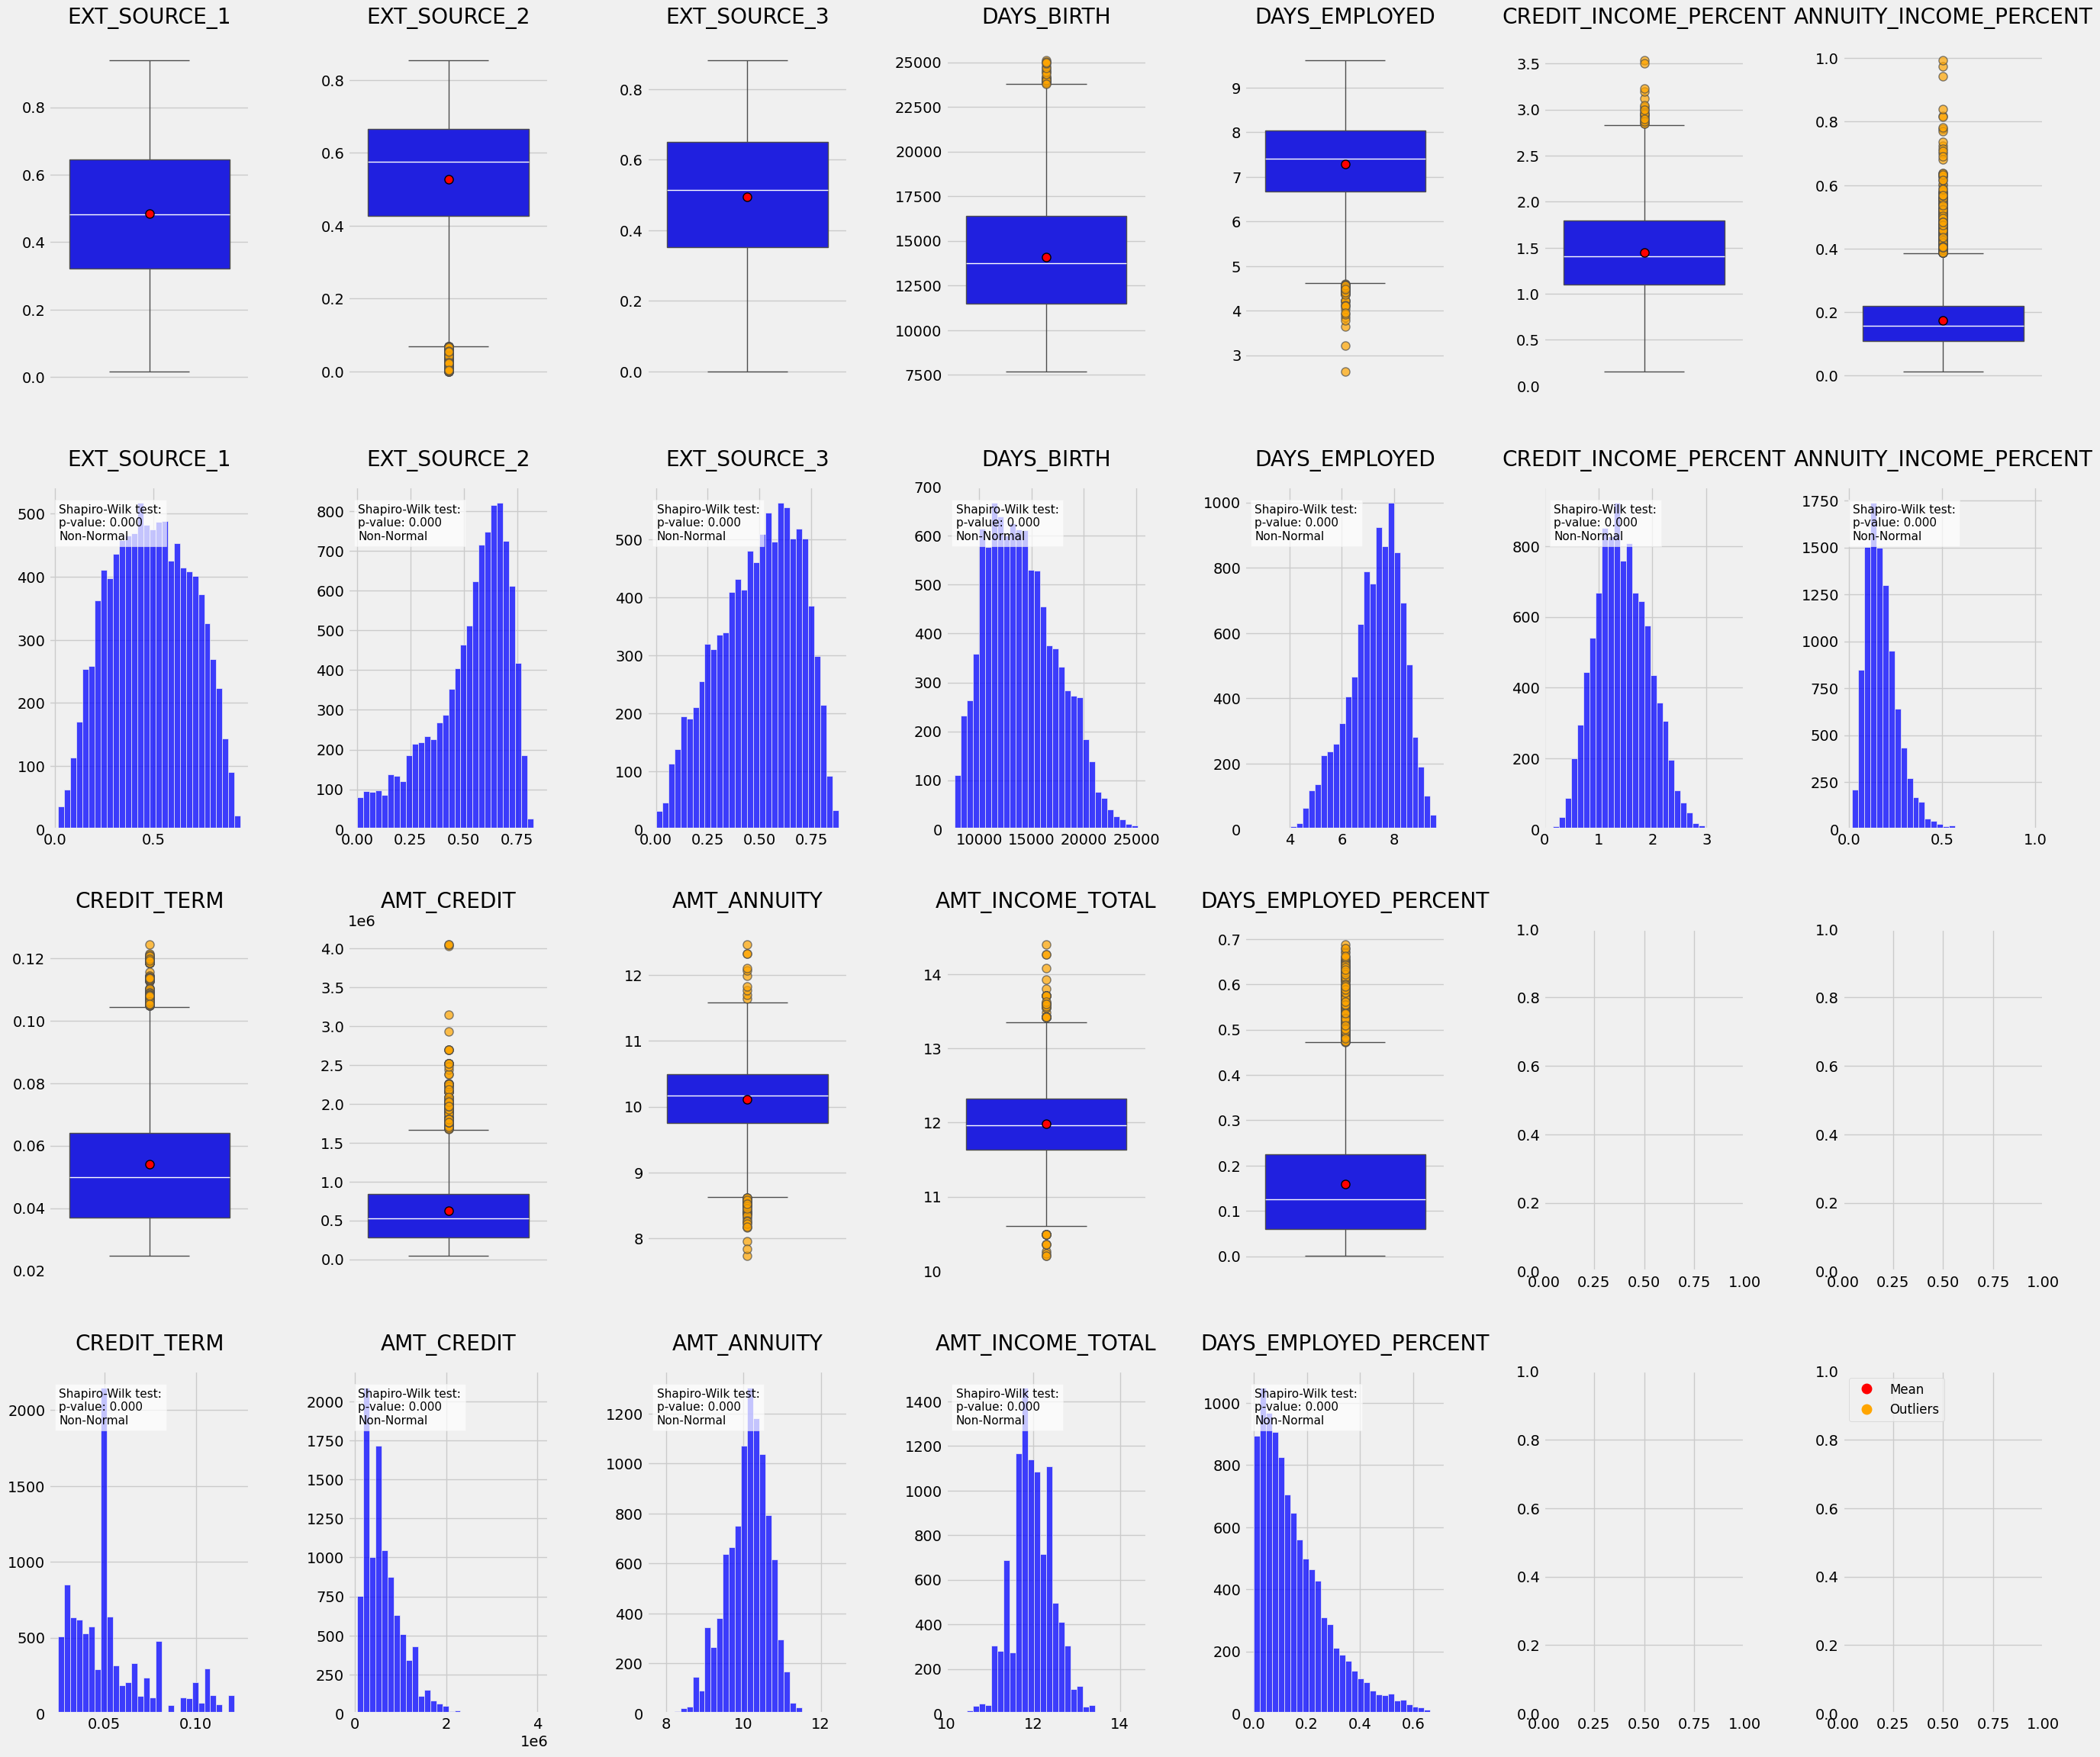

In [151]:
plot_distributions(df_model1_no_nan_log, df_model1_no_nan_log.iloc[:, 2:].columns.tolist())

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 3.2 - Log transformation of certain variables
</h3>
</div>

In [152]:
# Apply log transformation before building the ColumnTransformer
features_to_log_transform = ['DAYS_EMPLOYED', 'CREDIT_INCOME_PERCENT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']

X_train_log = df_train_sampled.copy()
X_test_log = df_test_no_nan.copy()

X_train_log[features_to_log_transform] = X_train_log[features_to_log_transform].apply(np.log1p)
X_test_log[features_to_log_transform] = X_test_log[features_to_log_transform].apply(np.log1p)

# Add suffix '_log' to the name of log-transformed columns
X_train_log.rename(columns={col: f"{col}_log" for col in features_to_log_transform}, inplace=True)
X_test_log.rename(columns={col: f"{col}_log" for col in features_to_log_transform}, inplace=True)

In [153]:
cols = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_BIRTH', 'DAYS_EMPLOYED_log', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'CREDIT_INCOME_PERCENT_log', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
       'AMT_CREDIT', 'AMT_ANNUITY_log', 'AMT_INCOME_TOTAL_log',
       'DAYS_EMPLOYED_PERCENT']

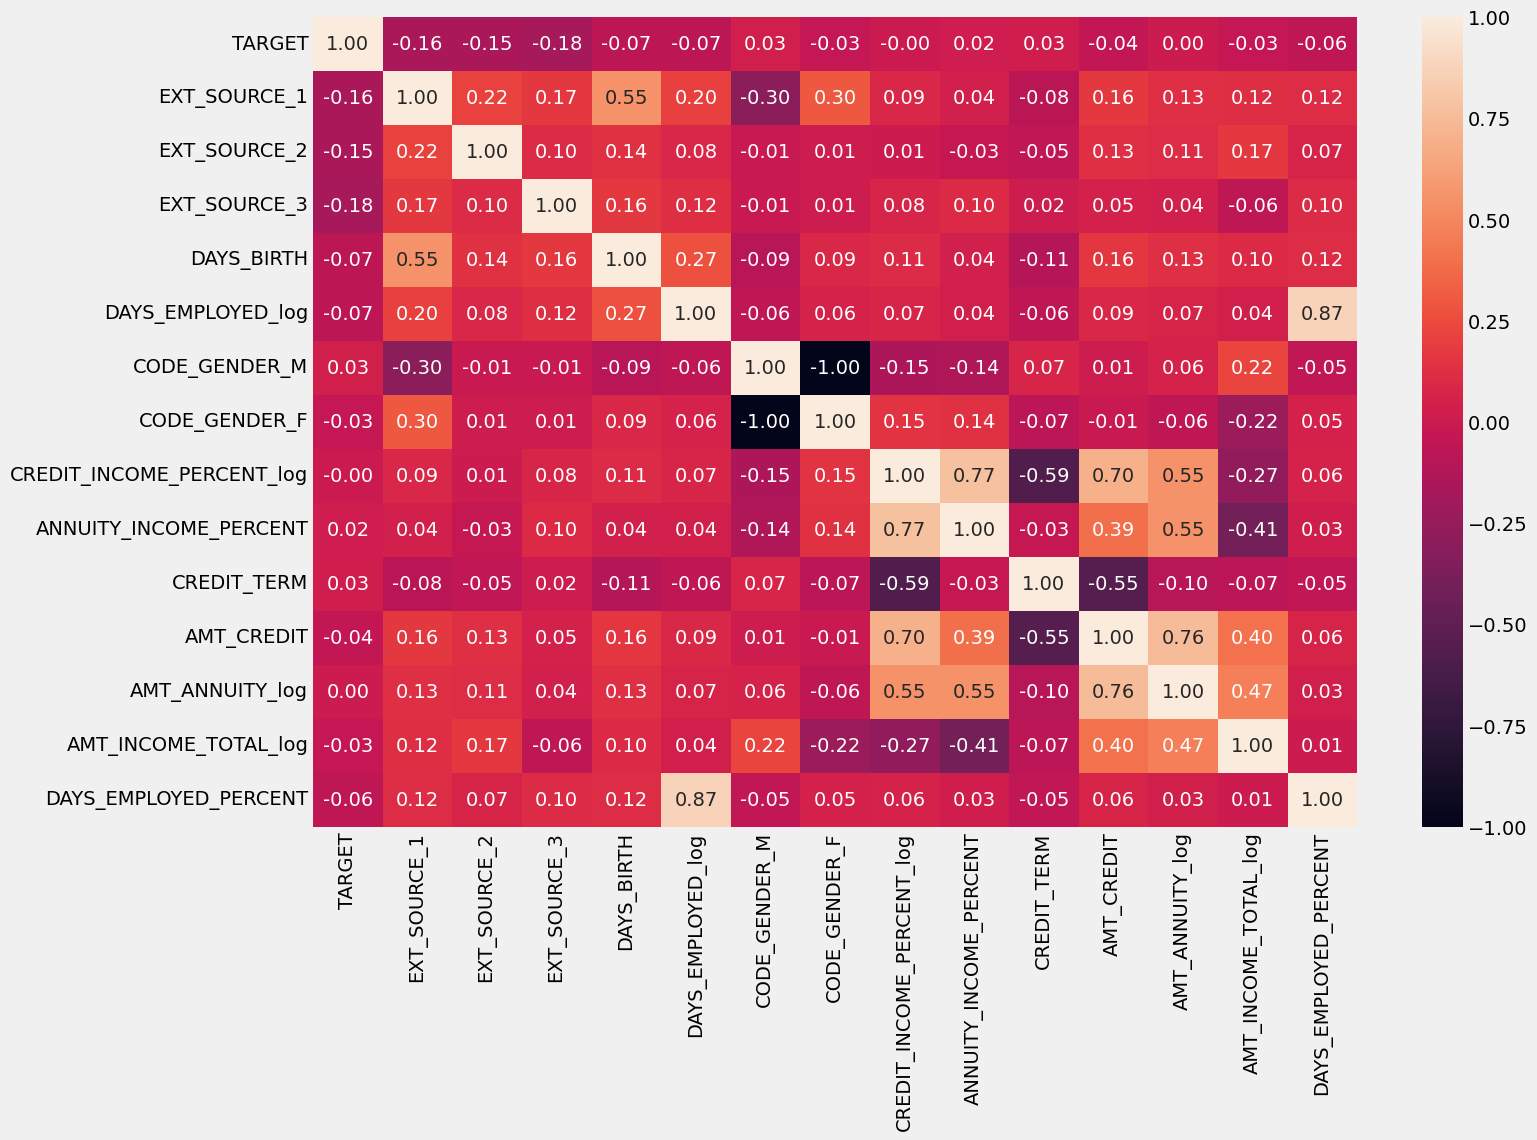

In [154]:
corr_matrix = X_train_log[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>The variable CODE_GENDER_F is redundant so we can remove it. We already have this information in CODE_GENDER_M : 1 = male, 0 = female.
</p>
</div>

In [155]:
# drop redundant column
X_train_log = X_train_log.drop(columns=['CODE_GENDER_F'])
X_test_log = X_test_log.drop(columns=['CODE_GENDER_F'])

In [156]:
# check if removed
X_train_log.shape

(9896, 15)

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Since the test set lacks a target variable, we will split the training set into training and validation sets so as to evaluate our model both during cross validation and after because the validation set will serve as a test set for our best model.
</p>
</div>

In [157]:
# split target from X_train_log
y = X_train_log['TARGET']
X_log = X_train_log.drop(columns=['TARGET'])

<div style='background-color: white; padding: 20px'>
<h3 style='color: blue; fontweight: bold'>Part 3.3 - Defining a column transformer + the models we are going to use and their hyperparameters
</h3>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black; fontweight: bold'>Remember that:
    <ul style='color: black; fontweight: bold'>
        <li>
        <b>True Positives</b> are 'bad' clients who have not repaid their loans on time
        </li>
        <li>
        <b>True Negatives</b> are 'good' clients who have repaid their loans on time
        </li>
        <li>
        <b>False Negatives</b> are 'bad' clients who were mistaken for good clients
        </li>
        <li>
        <b>False Positives</b> are 'good' clients who were mistaken for bad clients
        </li>
    </ul>
</p><p style='color: black; fontweight: bold'>That means we need to minimize the number of False Negatives, therefore the recall should be as high as possible.</p>
</div>

In [158]:
# define random forest model and its hyperparameters for classification
linear_models = {
    # Define Logistic Regression model and its hyperparameters
    'LogisticRegression': {
        'model': LogisticRegression(random_state=66),  # Logistic Regression model with a fixed random state for reproducibility
        'param_grid': {
            'classifier__penalty': ['l1', 'l2'],  # Type of regularization: L1 (Lasso), L2 (Ridge), ElasticNet, or no penalty
            'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength (inverse); smaller values indicate stronger regularization
            'classifier__solver': ['liblinear', 'saga'],  # Optimization algorithm: liblinear, saga (for large datasets), or lbfgs
            'classifier__max_iter': [100],  # Maximum number of iterations taken for the solvers to converge
            # 'classifier__l1_ratio': [0.1, 0.5, 0.9],  # ElasticNet mixing parameter (only relevant if penalty='elasticnet')
        }
    }
}

In [159]:
non_linear_models = {
    # define a random forest and its hyperparameters
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=66),
        'param_grid': {
            'classifier__n_estimators': [100],  # Number of trees in the forest
            'classifier__max_depth': [3, 5, 7],  # Maximum depth of the tree
            'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
            'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
        }
    },
    # define a gradient boosting model and its hyperparameters
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(random_state=66),  # Gradient Boosting classifier with fixed random state
        'param_grid': {
            'classifier__n_estimators': [100, 200],  # Number of boosting stages to be run (equivalent to the number of trees)
            'classifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage for each iteration
            'classifier__max_depth': [3, 5],  # Maximum depth of individual trees
            'classifier__min_samples_split': [2, 5],  # Minimum samples required to split a node
            'classifier__min_samples_leaf': [1, 2],  # Minimum samples required to be at a leaf node
            'classifier__subsample': [0.8, 1.0]  # Fraction of samples used for fitting individual base learners
        }
    },
}

In [160]:
# function to create experiments
def create_experiments(experiment_name: str, artifact_location: str, tags: dict[str, Any]) -> str:
    """_summary_

    Args:
        experiment_name (str): name of experiment
        artifact_location (str): its location 
        tags (dict[str, Any]): envrionnement type and version

    Returns:
        str: experiment id of a given experiment
    """
    try:
        experiment_id = mlflow.create_experiment(
            name=experiment_name, 
            artifact_location=artifact_location,
            tags=tags
            )
    except:
        print(f"Experiment {experiment_name} already exists")
        experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
        
    return experiment_id

In [161]:
# function to retrieve an experiment using its id or name or both
def get_mlflow_experiment(experiment_id: str=None, experiment_name: str=None) -> mlflow.entities.Experiment:
    if experiment_id is not None:
        experiment =  mlflow.get_experiment(experiment_id)
    elif experiment_name is not None:
        experiment = mlflow.get_experiment_by_name(experiment_name)
    else:
        raise ValueError("Either experiment_id or experiment_name must be provided")
    return experiment

In [162]:
# initialize scaler
scaler = StandardScaler()

# Define list of variables to scale, excluding variables already ranging from 0 to 1
features_to_scale = [
                    'AMT_CREDIT',
                    'AMT_ANNUITY_log',
                    'AMT_INCOME_TOTAL_log',
                    'DAYS_EMPLOYED_log',
                    'DAYS_BIRTH',
                    'CREDIT_INCOME_PERCENT_log',        
                    ]

# features_to_scale = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
#        'DAYS_BIRTH', 'DAYS_EMPLOYED_log', 'CODE_GENDER_M',
#        'CREDIT_INCOME_PERCENT_log', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
#        'AMT_CREDIT', 'AMT_ANNUITY_log', 'AMT_INCOME_TOTAL_log',
#        'DAYS_EMPLOYED_PERCENT']

# define column transfomer
col_transformer = make_column_transformer((scaler, [3, 4, 6, 9, 10, 11]), remainder='passthrough')

In [163]:
X_log.head(1)

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED_log,CODE_GENDER_M,CREDIT_INCOME_PERCENT_log,ANNUITY_INCOME_PERCENT,CREDIT_TERM,AMT_CREDIT,AMT_ANNUITY_log,AMT_INCOME_TOTAL_log,DAYS_EMPLOYED_PERCENT
235815,373144,0.639797,0.692609,0.588488,16000,9.134862,False,1.445393,0.22056,0.068,364896.0,10.119163,11.630717,0.5795


In [164]:
# function that trains models using gridsearchcv
def testing_models_with_gridsearch(models, col_transformer, X, y, test_size=0.2, 
                                cost_fn_fp_ratio=10, lime_plot_sample_index=0):
    
    # Separate SK_ID_CURR from the features
    identifiers = X[['SK_ID_CURR']]
    X_features = X.drop(columns=['SK_ID_CURR'])
    
    # Split training set into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_features, y, test_size=test_size, random_state=66, stratify=y)
    print(f"Data split: Training set: {len(X_train)}, Validation set: {len(X_val)}")
    
    # Apply SMOTE to balance the classes in the training set
    smote = SMOTE(random_state=66)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Data after SMOTE: Training set: {len(X_train_resampled)}, Validation set: {len(X_val)}")
    
    print("shape of  X_train_resampled: ",  X_train_resampled.shape)
    print("shape of  y_train_resampled: ",  y_train_resampled.shape)
    
    
    # Configure mlflow tracking server
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    
    # Generate the experiment id using its name with the current date concatenated to it,
    # the model version and the artifacts location
    current_experiment_id = create_experiments(experiment_name = f"experiment_{datetime.now().strftime('%y%m%d')}",
                                    artifact_location = f"artifacts_of_exp_{datetime.now().strftime('%y%m%d')}",
                                    tags = {"env": "dev", "version":  datetime.now().strftime('%y_%m_%d')},
                    )
    
    experiment = get_mlflow_experiment(experiment_id=current_experiment_id)
    print("Name of experiment {}".format(experiment.name))
    for model_name, config in models.items():
        print(f"\nTesting {model_name}...")
        # start a run for each model in models
        with mlflow.start_run(run_name=model_name) as run:
            print("---- Run info ----")
            print()
            print("Run id: {}".format(run.info.run_id))
            print("Experiment id: {}".format(run.info.experiment_id))
            print("Status: {}".format(run.info.status))
            print("Start time: {}".format(run.info.start_time))
            print("lifecycle_stage: {}".format(run.info.lifecycle_stage))
            
            # Create a pipeline for current model with oversampling of the
            # minority class using SMOTE 
            pipeline = SMOTE_Pipeline(steps=[
                ('preprocessor', col_transformer),
                ('smote', SMOTE(random_state=66)),
                ('classifier', config['model'])
            ])

            # Initialize a GridSearchCV using the pipeline and the hyperparameter grid
            grid_search = GridSearchCV(pipeline, config['param_grid'], cv=5, scoring='roc_auc')
            grid_search.fit(X_train_resampled, y_train_resampled)

            # retrieve the best hyperparameters and the best performing model
            best_params = grid_search.best_params_
            mlflow.log_param("best_params", best_params)
            best_model = grid_search.best_estimator_
            print(best_model)

            # calculate probabilities on the validation set
            y_pred_prob = best_model.predict_proba(X_val)[:, 1]

            # calculate the threshold that optimizes the tradeoff between recall and precision
            # given that we prioritize a high recall so as to reduce the number of false negatives
            def optimize_threshold(y_true, y_pred_prob, cost_fn_fp_ratio=10):
                thresholds = np.arange(0.1, 0.9, 0.05)
                best_threshold = 0.5
                min_cost = float('inf')

                for threshold in thresholds:
                    y_pred = (y_pred_prob >= threshold).astype(int)
                    fn = sum((y_true == 1) & (y_pred == 0))
                    fp = sum((y_true == 0) & (y_pred == 1))
                    cost = cost_fn_fp_ratio * fn + fp

                    if cost < min_cost:
                        min_cost = cost
                        best_threshold = threshold

                return best_threshold

            # calculate and log best threshold
            optimized_threshold = optimize_threshold(y_val, y_pred_prob, cost_fn_fp_ratio)
            mlflow.log_param("optimized_threshold", optimized_threshold)

            # modify predictions 
            y_pred_optimized = (y_pred_prob >= optimized_threshold).astype(int)

            # Calculate metrics
            accuracy = accuracy_score(y_val, y_pred_optimized)
            precision = precision_score(y_val, y_pred_optimized)
            recall = recall_score(y_val, y_pred_optimized)
            f1 = f1_score(y_val, y_pred_optimized)
            auc_score = roc_auc_score(y_val, y_pred_prob)

            # log metrics
            metrics = {
                    "accuracy": accuracy,
                    "precision": precision,
                    "recall": recall,
                    "f1_score": f1,
                    "roc_auc": auc_score
                    }
            mlflow.log_metrics(metrics)
            
            fig_pr = plt.figure()
            display_pr = PrecisionRecallDisplay.from_predictions(y_val, y_pred_optimized, ax=plt.gca())
            plt.title("Precison-Recall Curve")
            plt.legend()
            mlflow.log_figure(fig_pr, "precison_recall_curve.png")
            
            fig_cm = plt.figure()
            display_cm = ConfusionMatrixDisplay.from_predictions(y_val, y_pred_optimized, ax=plt.gca())
            plt.title("Confusion Matrix")
            plt.legend()
            mlflow.log_figure(fig_cm, "confusion_matrix.png")

            # plot roc curve
            fig_roc = plt.figure()
            fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
            plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
            plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
            plt.xlabel("False Positive Rate (FPR)")
            plt.ylabel("True Positive Rate (TPR)")
            plt.title(f"ROC Curve for {model_name}")
            plt.legend(loc="lower right")
            plt.grid()
            plt.show()
            mlflow.log_figure(fig_roc, "roc_curve.png")

            # save model 
            name_with_extension = model_name + '.joblib'
            model_path = os.path.join(os.getcwd(), 'best_models', name_with_extension)
            dump(best_model, model_path)
        
            # Extraire le transformateur de colonnes du pipeline
            preprocessor = best_model.named_steps['preprocessor']
            
            # Transformer les données d'entraînement et de test
            X_train_transformed = preprocessor.transform(X_train_resampled)
            X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train_resampled.columns.tolist())
            X_val_transformed = preprocessor.transform(X_val)
            X_val_transformed = pd.DataFrame(X_val_transformed, columns=X_val.columns.tolist())
            
            # ---- Local feature importance of best_model using first sample in the subset -------#

            # Créez un explainer LIME pour les données tabulaires
            explainer = LimeTabularExplainer(
                training_data=X_train_transformed.values,  # Données d'entraînement pour apprendre les distributions des features
                mode='classification',           # Modèle de classification
                feature_names=X_train_transformed.columns,         # Noms des features
            )

            # Sélectionnez une observation (une seule ligne) à analyser
            lime_plot_sample_index = lime_plot_sample_index
            observation = X_val_transformed.iloc[lime_plot_sample_index].values.reshape(1, -1)  

            # Expliquez la prédiction de `best_model` pour cette observation
            explanation = explainer.explain_instance(
                data_row=observation[0],  # Les données de l'observation
                predict_fn=best_model.predict_proba,  # La fonction de prédiction du modèle
                num_features=13  # Nombre de features à inclure dans l'explication
            )

            # Générer et sauvegarder la figure avec LIME
            sample_id = identifiers.iloc[lime_plot_sample_index].item()
            fig_lime_explanation = plt.figure(figsize=(12, 8))
            explanation.as_pyplot_figure()
            plt.title(f"Local feature importance (SK_ID_CURR: {sample_id})")
            plt.show() 
            fig_lime_explanation_path = "lime_explanation.png"
            # fig_lime_explanation.savefig(fig_lime_explanation_path, bbox_inches='tight')
            mlflow.log_figure(fig_lime_explanation, artifact_file=fig_lime_explanation_path)
            
            
            # ------ Global feature importance of best_model --------------#

            # Ne sélectionner que les shap values d'un échantillon du jeu de données pour réduire le temps de calcul
            k = 25
            sample = shap.sample(X_train_transformed, k)

            # Instancier un explainer
            mlflow.shap.log_explanation(best_model.named_steps['classifier'].predict, sample)
            client = MlflowClient()
            artifact_path = "model_explanations_shap"
            artifacts = [x.path for x in client.list_artifacts(run.info.run_id, artifact_path)]
            artifacts_path = client.download_artifacts(run.info.run_id, artifact_path)
                   
            # Path to the image file
            image_path = os.path.join(artifacts_path, "summary_bar_plot.png")
            # Load and display the image
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')  # Turn off axes
            plt.show()

           

            # save model signature
            model_signature = infer_signature(X_train, y_train, params={"model_name": model_name})

            # Log du modèle final
            mlflow.sklearn.log_model(best_model, 
                                    artifact_path=f"mlflow_model", 
                                    signature=model_signature,
                                    registered_model_name=model_name
                                    )
            print(f"Model: {model_name}")
            print(f"Metrics: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc_score:.4f}")
            print(f"Optimized threshold: {optimized_threshold}")
            

Data split: Training set: 7916, Validation set: 1980
Data after SMOTE: Training set: 14638, Validation set: 1980
shape of  X_train_resampled:  (14638, 13)
shape of  y_train_resampled:  (14638,)
Name of experiment experiment_250311

Testing LogisticRegression...
---- Run info ----

Run id: 0a60b50a456f4770a7742272db7ba2f5
Experiment id: 0
Status: RUNNING
Start time: 1741683985110
lifecycle_stage: active
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [3, 4, 6, 9, 10, 11])])),
                ('smote', SMOTE(random_state=66)),
                ('classifier',
                 LogisticRegression(C=10, penalty='l1', random_state=66,
                                    solver='liblinear'))])


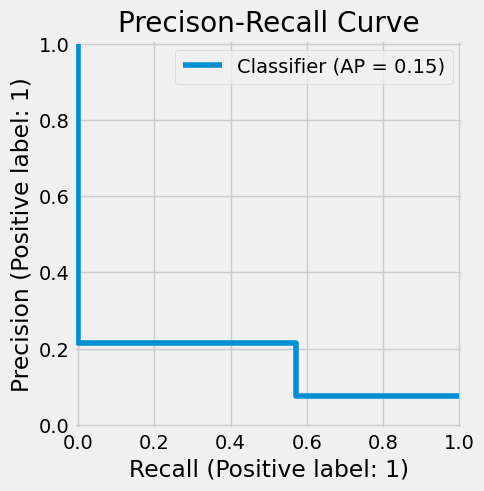

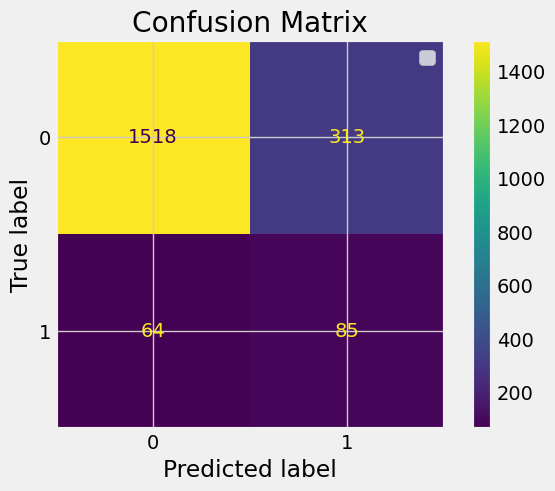

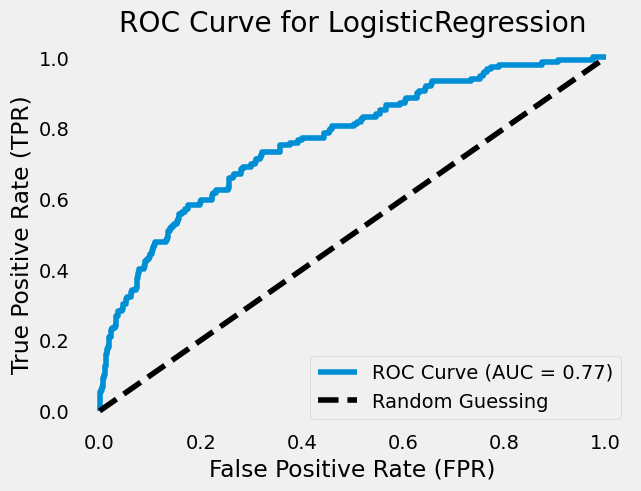

<Figure size 1200x800 with 0 Axes>

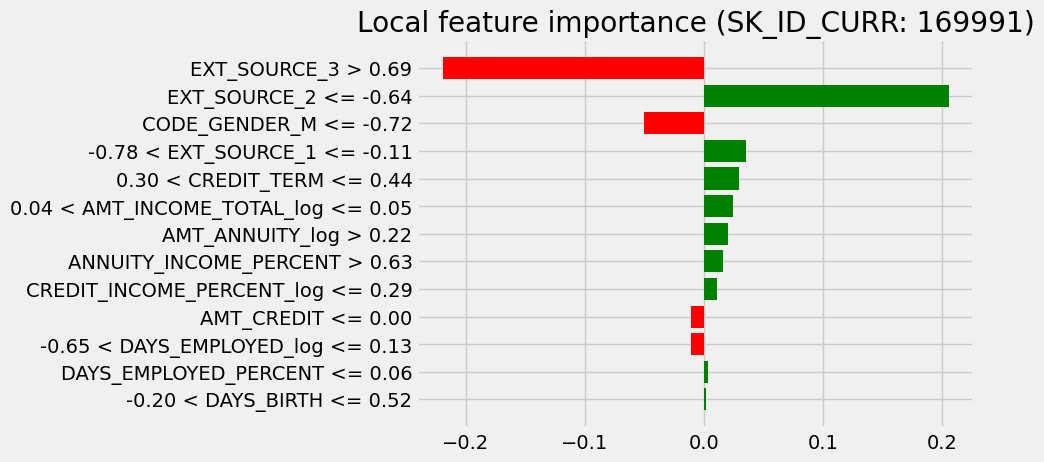

100%|██████████| 25/25 [00:02<00:00, 11.06it/s]


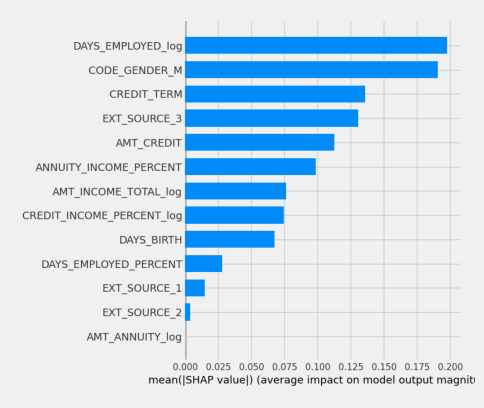

Successfully registered model 'LogisticRegression'.
2025/03/11 10:07:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 1


Model: LogisticRegression
Metrics: Accuracy: 0.8096, Precision: 0.2136, Recall: 0.5705, F1-Score: 0.3108, AUC: 0.7667
Optimized threshold: 0.6000000000000002
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/0/runs/0a60b50a456f4770a7742272db7ba2f5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


Created version '1' of model 'LogisticRegression'.


In [165]:
testing_models_with_gridsearch(linear_models, col_transformer, X_log, y, test_size=0.2, cost_fn_fp_ratio=10, 
                            lime_plot_sample_index=243)

In [ ]:
import json 
import requests
import mlflow.pyfunc
import pandas as pd

# Exemple de données d'entrée
data = pd.DataFrame({
    "EXT_SOURCE_1": [0.09],
    "EXT_SOURCE_2": [0.91],
    "EXT_SOURCE_3": [0.01],
    "DAYS_BIRTH": [15000],
    "DAYS_EMPLOYED_log": [0.001],
    "CODE_GENDER_M": [True],
    "CREDIT_INCOME_PERCENT_log": [0.01],
    "ANNUITY_INCOME_PERCENT": [0.08],
    "CREDIT_TERM": [0.8],
    "AMT_CREDIT": [0.38],
    "AMT_ANNUITY_log": [0.78],
    "AMT_INCOME_TOTAL_log": [0.22],
    "DAYS_EMPLOYED_PERCENT": [0.52]
})


# data_dict = data.to_dict(orient="records")
# # Convertir le dictionnaire en JSON
# data_json = json.dumps(data_dict)

# headers = {"Content-Type": "application/json"}
# endpoint = "http://127.0.0.1:5000/invocations"
# response = requests.post(endpoint, data=data_json, headers=headers)
# print("Status: ", response.status_code)
# print("Prediction: ", response.text)


In [173]:
X_train_log.head(1)

,TARGET,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED_log,CODE_GENDER_M,CREDIT_INCOME_PERCENT_log,ANNUITY_INCOME_PERCENT,CREDIT_TERM,AMT_CREDIT,AMT_ANNUITY_log,AMT_INCOME_TOTAL_log,DAYS_EMPLOYED_PERCENT
235815,0,373144,0.639797,0.692609,0.588488,16000,9.134862,False,1.445393,0.22056,0.068,364896.0,10.119163,11.630717,0.5795


In [175]:
X_test_log.head(2)

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED_log,CODE_GENDER_M,CREDIT_INCOME_PERCENT_log,ANNUITY_INCOME_PERCENT,CREDIT_TERM,AMT_CREDIT,AMT_ANNUITY_log,AMT_INCOME_TOTAL_log,DAYS_EMPLOYED_PERCENT
0,100001,0.752614,0.789654,0.159520,19241,NaN,False,1.651219,0.152300,0.036147,568800.0,9.931176,11.813037,-0.121044
1,100005,0.564990,0.291656,0.432962,18064,NaN,True,1.178711,0.175455,0.077973,222768.0,9.762557,11.502885,-0.247398


In [176]:

test_data = X_train_log.iloc[0, :]  # Sélectionner une ligne
test_data_df = test_data.to_frame().T  # Convertir en DataFrame et transposer

# Sauvegarder dans un fichier CSV
test_data_df.to_csv('test_data.csv', index=False)


In [172]:
test_data_df.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED_log,CODE_GENDER_M,CREDIT_INCOME_PERCENT_log,ANNUITY_INCOME_PERCENT,CREDIT_TERM,AMT_CREDIT,AMT_ANNUITY_log,AMT_INCOME_TOTAL_log,DAYS_EMPLOYED_PERCENT
0,100001,0.752614,0.789654,0.15952,19241,NaN,False,1.651219,0.1523,0.036147,568800.0,9.931176,11.813037,-0.121044
